In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [28]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [29]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# The zip object packs each pair of lats and lngs having the same index into a tuple. 

In [32]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [33]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [34]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

603

In [39]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | samarai
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | kasrawad
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | la rioja
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | aden
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | kirakira
Processing Record 15 of Set 1 | viedma
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | nan
Processing Record 18 of Set 1 | sao joao da barra
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | manda

In [40]:
len(city_data)

551

In [45]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

In [46]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Samarai,PG,2021-09-21 00:40:07,-10.6167,150.6667,77.49,89,100,11.81
1,Kasrawad,IN,2021-09-21 00:40:08,22.1333,75.6000,78.01,94,24,4.25
2,Esperance,AU,2021-09-21 00:40:08,-33.8667,121.9000,51.64,58,0,13.42
3,Chokurdakh,RU,2021-09-21 00:40:08,70.6333,147.9167,32.67,56,93,9.71
4,La Rioja,ES,2021-09-21 00:40:09,42.2500,-2.5000,46.18,91,100,5.30
5,Vaini,TO,2021-09-21 00:40:09,-21.2000,-175.2000,69.96,94,75,9.22
6,Tuktoyaktuk,CA,2021-09-21 00:40:09,69.4541,-133.0374,39.20,93,90,13.80
7,Avarua,CK,2021-09-21 00:40:09,-21.2078,-159.7750,75.25,83,90,8.05
8,Rikitea,PF,2021-09-21 00:40:10,-23.1203,-134.9692,73.99,76,15,11.61
9,Aden,YE,2021-09-21 00:38:53,12.7794,45.0367,84.07,84,10,6.24


In [47]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [48]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

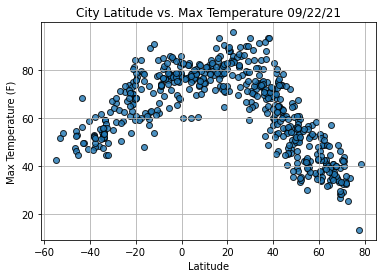

In [49]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

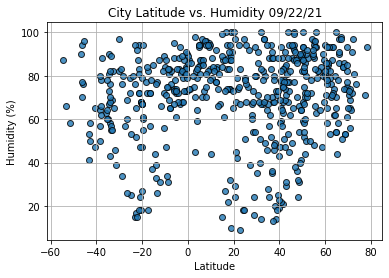

In [52]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

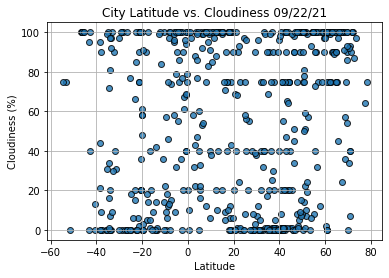

In [53]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

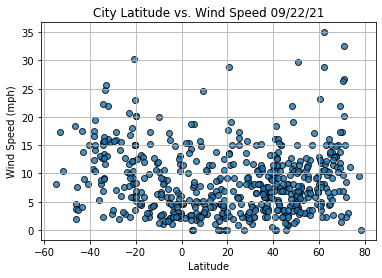

In [55]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()